In [1]:
import torchvision.transforms as T
from torch.utils.data import Subset, Dataset, DataLoader, random_split
from torch import nn
import torch.nn.functional
from torchvision.datasets import ImageFolder
from torchvision.io import read_image, ImageReadMode
import torch
import pickle as pkl
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [2]:
path = "../informatie/apple_disease_classification/images/Train/Dataset/normal_apples/good_apple0.jpg"
img = read_image(path, ImageReadMode.UNCHANGED)/255

print(img.shape)
print(img)

torch.Size([3, 128, 128])
tensor([[[0.9059, 0.9059, 0.9059,  ..., 0.9294, 0.9294, 0.9294],
         [0.9059, 0.9059, 0.9059,  ..., 0.9294, 0.9294, 0.9294],
         [0.9059, 0.9059, 0.9059,  ..., 0.9294, 0.9294, 0.9294],
         ...,
         [0.9490, 0.9490, 0.9490,  ..., 0.9725, 0.9725, 0.9725],
         [0.9529, 0.9529, 0.9529,  ..., 0.9725, 0.9725, 0.9725],
         [0.9529, 0.9529, 0.9529,  ..., 0.9725, 0.9725, 0.9725]],

        [[0.9216, 0.9216, 0.9216,  ..., 0.9294, 0.9294, 0.9294],
         [0.9216, 0.9216, 0.9216,  ..., 0.9294, 0.9294, 0.9294],
         [0.9216, 0.9216, 0.9216,  ..., 0.9294, 0.9294, 0.9294],
         ...,
         [0.9412, 0.9412, 0.9412,  ..., 0.9529, 0.9529, 0.9529],
         [0.9451, 0.9451, 0.9451,  ..., 0.9529, 0.9529, 0.9529],
         [0.9451, 0.9451, 0.9451,  ..., 0.9529, 0.9529, 0.9529]],

        [[0.9569, 0.9569, 0.9569,  ..., 0.9686, 0.9686, 0.9686],
         [0.9569, 0.9569, 0.9569,  ..., 0.9686, 0.9686, 0.9686],
         [0.9569, 0.9569, 0.9569

In [3]:

dataset_path = "../informatie/apple_disease_classification/images/Train/Dataset/"

In [4]:
class DatasetAppels(Dataset):
    def __init__(self, img_folder_path, transform):

        image_folder = ImageFolder(img_folder_path, transform=transform)
        print(image_folder.classes)
        self.images = [image[0] for image in image_folder]
        self.labels = image_folder.targets
        self.class_dict = image_folder.class_to_idx

    def labeler(self, label, len_classes):
        result = [0] * len_classes
        result[label] = 1
        return result

    def __len__(self):
        return len(self.images)
    
    def __getitem__(self, idx):
    
        return [self.images[idx], self.labels[idx]]
    


In [5]:
dataset = DatasetAppels(dataset_path, T.ToTensor())

next(iter(dataset))


['blotch_apples', 'normal_apples', 'rot_apples', 'scab_apples']


[tensor([[[0.6745, 0.6863, 0.7059,  ..., 0.6824, 0.6902, 0.6980],
          [0.6784, 0.6902, 0.7098,  ..., 0.6902, 0.6902, 0.6941],
          [0.6863, 0.7020, 0.7137,  ..., 0.7020, 0.6941, 0.6902],
          ...,
          [0.6235, 0.6275, 0.6314,  ..., 0.0275, 0.0235, 0.0863],
          [0.6275, 0.6353, 0.6431,  ..., 0.0353, 0.0039, 0.0039],
          [0.6275, 0.6353, 0.6431,  ..., 0.1059, 0.0392, 0.1137]],
 
         [[0.5490, 0.5608, 0.5804,  ..., 0.5725, 0.5804, 0.5882],
          [0.5529, 0.5647, 0.5843,  ..., 0.5804, 0.5804, 0.5843],
          [0.5608, 0.5765, 0.5882,  ..., 0.5922, 0.5843, 0.5804],
          ...,
          [0.4863, 0.4902, 0.4863,  ..., 0.0118, 0.0000, 0.0588],
          [0.4902, 0.4980, 0.4980,  ..., 0.0314, 0.0000, 0.0000],
          [0.4902, 0.4980, 0.4980,  ..., 0.1098, 0.0314, 0.1020]],
 
         [[0.4510, 0.4627, 0.4824,  ..., 0.4784, 0.4863, 0.4941],
          [0.4549, 0.4667, 0.4863,  ..., 0.4863, 0.4863, 0.4902],
          [0.4627, 0.4784, 0.4902,  ...,

In [6]:
resize = T.Resize((64,64))

for i in range(len(dataset.images)):
    dataset.images[i] = resize(dataset.images[i])

print(dataset.images[0].shape)

C:\Users\nilsm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\torchvision\transforms\functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


torch.Size([3, 64, 64])


In [7]:
print(dataset.labels)
print(dataset.class_dict)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [8]:
print(dataset.images[0].type())
print(dataset.images[1000].type())
print(dataset.images[1700].type())
print(dataset.images[2200].type())

torch.FloatTensor
torch.FloatTensor
torch.FloatTensor
torch.FloatTensor


In [19]:
generator1 = torch.Generator().manual_seed(13)

# create a train test split with 60% train, 20% test, 20% val. For later use
train_dataset, test_dataset, val_dataset = random_split(dataset, [0.6, 0.2, 0.2], generator=generator1)

# Print length of the splits to doublecheck.
print(len(train_dataset), len(test_dataset), len(val_dataset))

# Create train, test and val dataloaders for later use.
train_loader = DataLoader(train_dataset, batch_size=100, shuffle=True)

test_loader = DataLoader(test_dataset, batch_size=50, shuffle=False)

val_loader = DataLoader(val_dataset, batch_size=50, shuffle=False)

1794 598 597


In [24]:
# Create the convolutional neural net.
class CNN(nn.Module):
# ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
    
    def __init__(self, img_size=64, c_in=3, loss_func=nn.CrossEntropyLoss()):
        # Use super() to call the nn.Module.
        super().__init__()

        # Use nn.Sequential() to configure the layers.
        self.model = nn.Sequential(
            nn.Conv2d(c_in, 16, 3, padding=1),
            nn.ReLU(),
            nn. Conv2d(16, 16, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2,2),

            nn.Conv2d(16, 32, 3, padding=1),
            nn.ReLU(),
            nn. Conv2d(32, 32, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2,2),

            # Flatten for the linear layer.
            nn.Flatten(),
            nn.Linear(img_size*128, 512),
            nn.ReLU(),
            nn.Linear(512, 128),
            nn.ReLU(),
            nn.Linear(128, 4),
            # Use softmax to create an output between 0 and 1 times 4, which makes it so the sum of the 4 outputs equals 1.
            nn.Softmax(dim=1)
            )
        
        self.loss_func = loss_func
# ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- 
    # Create function to train my model with.
    def fit(self, train_loader, val_loader, test_loader, epochs, lr, opt_function=torch.optim.Adam):
        
        optimizer = opt_function(self.model.parameters(),lr )
        self.model.to(self.cuda_available())
        history = []
        
        for epoch in range(epochs):
            print("epoch:",epoch+1)
            self.model.train()
            
            for batch in train_loader:
                optimizer.zero_grad()
                loss = self.loss_calc(batch)
                loss.backward()
                optimizer.step()
                
            with torch.no_grad():    
                self.model.eval()
                val_loss = []

                for batch in val_loader:
                    loss = self.loss_calc(batch)
                    val_loss.append(loss)  
            
            history.append(sum(val_loss))
            print(sum(val_loss))        
        
        accuracy = print("Accuracy:",round(self.evaluate_accuracy(test_loader)))
        return history, accuracy
# ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
    
    def cuda_available(self):

        if torch.cuda.is_available():
            return torch.device("cuda")
        else:
            return torch.device("cpu")
# ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
                
    def loss_calc(self, batch):
        image = batch[0].to(self.cuda_available())
        labels = batch[1].to(self.cuda_available())
        pred = self(image)        
        loss = self.loss_func(pred, labels)
        return loss

# ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

    def evaluate_accuracy(self, test_loader):
        model_pred = []
        actual_pred = []
        cor_pred = 0
        bad_pred = 0
        for batch in test_loader:
            image, labels = batch
            image = image.to(self.cuda_available())
            labels = labels.to(self.cuda_available())
            pred = self(image)
    
            _, y_pred = torch.max(pred,1)                   
            model_pred.extend(y_pred.data.cpu().numpy())
            actual_pred.extend(labels.data.cpu().numpy())

            # for i in range(len(y_pred)):
            #     result = [0] * len(pred[0])

            #     p = int(y_pred[i])
            #     result[p] = 1
            for image, labels in zip(y_pred, labels):
                if image == labels:
                    cor_pred += 1
                else:
                    bad_pred += 1


            
        classes = ('blotch_apples', 'normal_apples', 'rot_apples', 'scab_apples')

        # Build confusion matrix
        cf_matrix = confusion_matrix(model_pred, actual_pred)
        df_cm = pd.DataFrame(cf_matrix / np.sum(cf_matrix, axis=1)[:, None], index = [i for i in classes], columns = [i for i in classes]).fillna(0)

        print(model_pred)
        print(actual_pred)
        print(cf_matrix)
        print(df_cm)

        plt.figure(figsize = (12,7))
        sn.heatmap(df_cm, annot=True)
        plt.show()

        acc = cor_pred/(cor_pred + bad_pred) * 100
        return acc
    
# -------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------    
    
    def predict_image(self, image):
        image = image.to(self.cuda_available())
        pred = self(image)
        print(pred)

        _, y_pred = torch.max(pred,1)                
        result = [0] * len(pred[0])
        p = int(y_pred[0])
        result[p] = 1

        return result
# ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
    
    # def predict_batch(self, batch):
    #     good_apples = 0
    #     bad_apples = 0
    #     for image in batch:
    #         image = image.to(self.cuda_available())
    #         pred = self(image)
    
    #         _, y_pred = torch.max(pred,1)                       
            
    #         for i in range(len(y_pred)):
    #             result = [0] * len(pred[0])

    #             p = int(y_pred[i])
    #             result[p] = 1
    #             if result == [0,1,0,0]:
    #                 good_apples += 1
    #             else:
    #                 bad_apples += 1

    #     acc = good_apples/(good_apples + bad_apples) * 100
    #     return f"The amount of good apples in this batch is: {acc}%"
# ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
    
    # CONFUSION MATRIX
    


    
    def forward(self, data):

        return self.model(data)


epoch: 1
tensor(16.4847, device='cuda:0')
epoch: 2
tensor(16.1639, device='cuda:0')
epoch: 3
tensor(15.9825, device='cuda:0')
epoch: 4
tensor(15.8711, device='cuda:0')
epoch: 5
tensor(15.2776, device='cuda:0')
epoch: 6
tensor(14.7934, device='cuda:0')
epoch: 7
tensor(14.3956, device='cuda:0')
epoch: 8
tensor(14.1833, device='cuda:0')
epoch: 9
tensor(14.0618, device='cuda:0')
epoch: 10
tensor(13.8569, device='cuda:0')
epoch: 11
tensor(13.7675, device='cuda:0')
epoch: 12
tensor(13.6942, device='cuda:0')
epoch: 13
tensor(13.6423, device='cuda:0')
epoch: 14
tensor(13.5528, device='cuda:0')
epoch: 15
tensor(13.6047, device='cuda:0')
epoch: 16
tensor(13.4921, device='cuda:0')
epoch: 17
tensor(13.3623, device='cuda:0')
epoch: 18
tensor(13.6258, device='cuda:0')
epoch: 19
tensor(13.2185, device='cuda:0')
epoch: 20
tensor(13.2085, device='cuda:0')
epoch: 21
tensor(13.0880, device='cuda:0')
epoch: 22
tensor(13.0676, device='cuda:0')
epoch: 23
tensor(12.9515, device='cuda:0')
epoch: 24
tensor(12.

C:\Users\nilsm\AppData\Local\Temp\ipykernel_7768\1630602291.py:117: RuntimeWarning: invalid value encountered in divide
  df_cm = pd.DataFrame(cf_matrix / np.sum(cf_matrix, axis=1)[:, None], index = [i for i in classes], columns = [i for i in classes]).fillna(0)


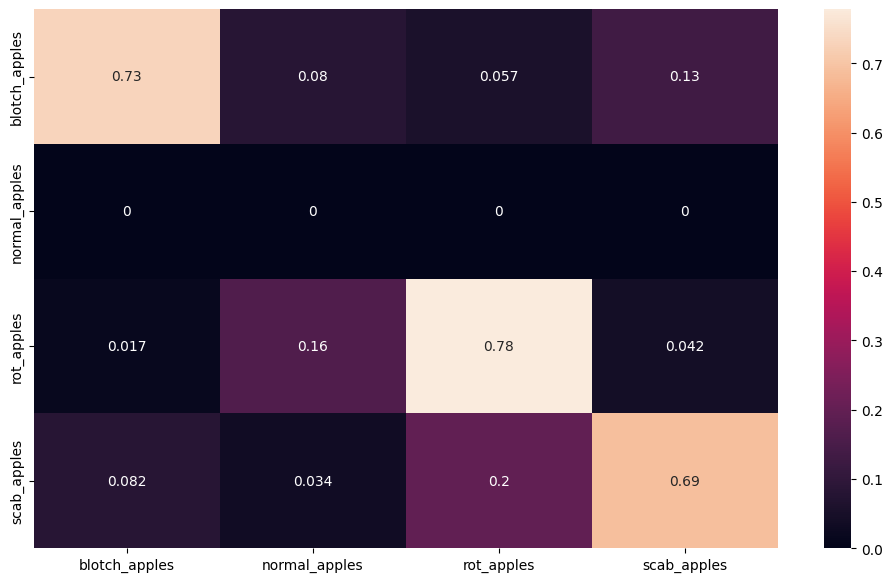

Accuracy: 74


([tensor(16.4847, device='cuda:0'),
  tensor(16.1639, device='cuda:0'),
  tensor(15.9825, device='cuda:0'),
  tensor(15.8711, device='cuda:0'),
  tensor(15.2776, device='cuda:0'),
  tensor(14.7934, device='cuda:0'),
  tensor(14.3956, device='cuda:0'),
  tensor(14.1833, device='cuda:0'),
  tensor(14.0618, device='cuda:0'),
  tensor(13.8569, device='cuda:0'),
  tensor(13.7675, device='cuda:0'),
  tensor(13.6942, device='cuda:0'),
  tensor(13.6423, device='cuda:0'),
  tensor(13.5528, device='cuda:0'),
  tensor(13.6047, device='cuda:0'),
  tensor(13.4921, device='cuda:0'),
  tensor(13.3623, device='cuda:0'),
  tensor(13.6258, device='cuda:0'),
  tensor(13.2185, device='cuda:0'),
  tensor(13.2085, device='cuda:0'),
  tensor(13.0880, device='cuda:0'),
  tensor(13.0676, device='cuda:0'),
  tensor(12.9515, device='cuda:0'),
  tensor(12.9416, device='cuda:0'),
  tensor(12.8440, device='cuda:0'),
  tensor(12.7695, device='cuda:0'),
  tensor(12.7110, device='cuda:0'),
  tensor(12.6800, device='cu

In [27]:
# Loop over dataloader and push images and labels to device
# dataset.images.to("cuda")
# dataset.labels.to("cuda")

net = CNN()

net.fit(train_loader, val_loader, test_loader, lr = 0.00008, epochs=50)


In [13]:
model_path = "..//models/CNN_75"

with open(model_path, 'wb') as f:
        pkl.dump(net, f)

In [14]:
# load = open(model_path, "rb")
# loaded_net = pkl.load(load)

normal = [120,121,122,123]

for i in normal:
    test_path = f"../informatie/apple_disease_classification/images/Test/blotch_Apple/{i}.jpg"
    test_img = read_image(test_path, ImageReadMode.UNCHANGED)/255

    test_img = resize(test_img)
    print(net(test_img.unsqueeze(0).to("cuda")))
    test_img = test_img.unsqueeze(0)
    result = net.predict_image(test_img)
    print(result)
    # test_img.shape
    

tensor([[5.3777e-01, 4.7317e-05, 1.3277e-03, 4.6085e-01]], device='cuda:0',
       grad_fn=<SoftmaxBackward0>)
tensor([[5.3777e-01, 4.7317e-05, 1.3277e-03, 4.6085e-01]], device='cuda:0',
       grad_fn=<SoftmaxBackward0>)
[1, 0, 0, 0]
tensor([[7.5662e-01, 1.3526e-04, 2.3706e-02, 2.1954e-01]], device='cuda:0',
       grad_fn=<SoftmaxBackward0>)
tensor([[7.5662e-01, 1.3526e-04, 2.3706e-02, 2.1954e-01]], device='cuda:0',
       grad_fn=<SoftmaxBackward0>)
[1, 0, 0, 0]
tensor([[6.9951e-01, 8.7026e-05, 6.5980e-03, 2.9380e-01]], device='cuda:0',
       grad_fn=<SoftmaxBackward0>)
tensor([[6.9951e-01, 8.7026e-05, 6.5980e-03, 2.9380e-01]], device='cuda:0',
       grad_fn=<SoftmaxBackward0>)
[1, 0, 0, 0]
tensor([[8.1960e-01, 4.4554e-05, 2.0864e-02, 1.5950e-01]], device='cuda:0',
       grad_fn=<SoftmaxBackward0>)
tensor([[8.1960e-01, 4.4554e-05, 2.0864e-02, 1.5950e-01]], device='cuda:0',
       grad_fn=<SoftmaxBackward0>)
[1, 0, 0, 0]


C:\Users\nilsm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\torchvision\transforms\functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


In [15]:
import os
os.getcwd()

'c:\\Users\\nilsm\\workspace\\MakeAIWork3\\Project 3\\notebooks'

In [16]:
# def evaluate_accuracy(self, test_loader):         
#         cor_pred = 0
#         bad_pred = 0
#         for batch in test_loader:
#             image, labels = batch
#             image = image.to(self.cuda_available())
#             labels = labels.to(self.cuda_available())
#             result = self.predict(image)

#             for i in range(len(result)):

#                 if result == labels[i].tolist():
#                     cor_pred += 1
#                 else:
#                     bad_pred += 1

#         acc = cor_pred/(cor_pred + bad_pred) * 100
#         return acc     
    
#     def predict(self, image):
#         pred = self(image)
#         _, y_pred = torch.max(pred,1)                       
        
#         for i in range(len(y_pred)):
#             result = [0] * len(pred[0])

#             p = int(y_pred[i])
#             result[p] = 1

#         return result